In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# 1. Load  CSV dataset
df = pd.read_csv("processed_dataset.csv")

# Preview dataset
print("Dataset preview:")
print(df.head())


# 2. Convert date column to numeric(In here convert InvoiceDate to ordinal)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'] = df['InvoiceDate'].map(pd.Timestamp.toordinal)


Dataset preview:
  InvoiceDate   Revenue  DayOfWeek  Month  Quarter  Year  Revenue_Scaled
0  2009-12-01  54351.23          1     12        4  2009        0.270513
1  2009-12-02  63172.58          2     12        4  2009        0.314418
2  2009-12-03  73972.45          3     12        4  2009        0.368171
3  2009-12-04  40582.32          4     12        4  2009        0.201984
4  2009-12-05   9803.05          5     12        4  2009        0.048791


In [5]:
# 3. Separate features (X) and target (y)
X = df.drop('Revenue_Scaled', axis=1)
y = df['Revenue_Scaled']

# 4. Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# 5. Create and train Random Forest Regressor

model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42
)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [7]:
# 6. Make predictions

y_pred = model.predict(X_test)



In [8]:
# 7. Calculate metrics For Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Calculate Cohen's f² effect size
f2 = r2 / (1 - r2) if r2 < 1 else np.inf  # prevent division by zero

# Display results
print("\nModel Performance Metrics")
print("-" * 35)
print(f"Mean Absolute Error (MAE):       {mae:.4f}")
print(f"Mean Squared Error (MSE):        {mse:.4f}")
print(f"Root Mean Squared Error (RMSE):  {rmse:.4f}")
print(f"R² Score:                        {r2:.4f}")
print(f"Cohen's f² Effect Size:           {f2:.4f}")


Model Performance Metrics
-----------------------------------
Mean Absolute Error (MAE):       0.0008
Mean Squared Error (MSE):        0.0000
Root Mean Squared Error (RMSE):  0.0030
R² Score:                        0.9993
Cohen's f² Effect Size:           1372.5946


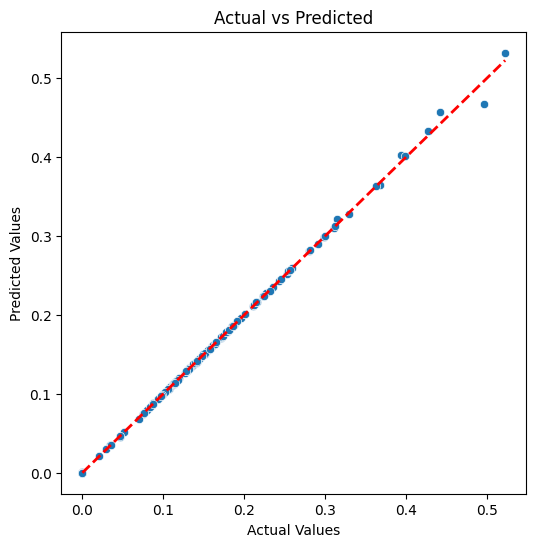

In [9]:
# Visualizations:Actual vs Predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

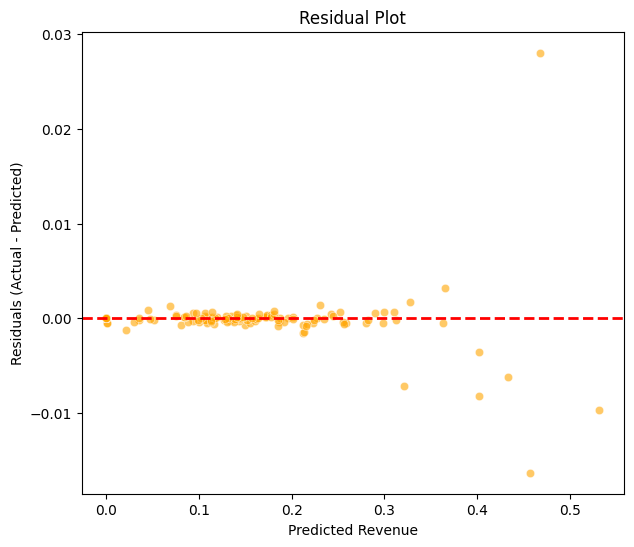

In [10]:
#Visualization
residuals = y_test - y_pred

plt.figure(figsize=(7,6))
sns.scatterplot(x=y_pred, y=residuals, color="orange", alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title("Residual Plot")
plt.xlabel("Predicted Revenue")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()



In [25]:
#For model  improvement

#1.Hyperparameters tuning using grid search cv
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 1.0],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2', 1.0],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='r2', verbose=2)

In [27]:
# 6. Best model and predictions

best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

y_pred = best_rf.predict(X_test)

Best Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [28]:
#cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    model,
    X_train,
    y_train,
    cv=10,                 # 10-fold cross-validation
    scoring='r2',
    n_jobs=-1
)

print("Cross-validation R² scores:", scores)
print("Mean CV R²:", np.mean(scores))
print("Standard deviation:", np.std(scores))

Cross-validation R² scores: [0.9924941  0.98415229 0.99995875 0.84079274 0.99992919 0.99984709
 0.99990167 0.9988905  0.99971128 0.99922501]
Mean CV R²: 0.9814902631527677
Standard deviation: 0.04714900874333242


In [29]:
# 7. Evaluate performance

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics after Tuning")
print("----------------------------------------")
print(f"Mean Absolute Error (MAE):       {mae:.6f}")
print(f"Mean Squared Error (MSE):        {mse:.6f}")
print(f"Root Mean Squared Error (RMSE):  {rmse:.6f}")
print(f"R² Score:                        {r2:.6f}")


Model Performance Metrics after Tuning
----------------------------------------
Mean Absolute Error (MAE):       0.000829
Mean Squared Error (MSE):        0.000009
Root Mean Squared Error (RMSE):  0.003028
R² Score:                        0.999272
